#Libs and Data Import


In [0]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans


In [67]:
#import IPO data and check on first 5 lines
df_raw = pd.read_csv("https://drive.google.com/uc?export=download&id=1pmRItdBzL3WeQGJtBptj3cmzrQZn_nF1")
df_raw.head()

,Company,Industry,Employee_size,Age,IsUs,Revenues_millions,Net_Income_millions,Is_top8_IB,Exchange,Offer_Date,Shares_millions,Est_volume_millions,Offer_Price,First_Day_Close
0,Afya Limited,Consumer Services,2705,20,0,109.7,32.95,1,NYSE,7/19/2019,13.74,261.10,19.0,23.84
1,111,Consumer Services,1117,9,0,184.0,-37.30,1,NASDAQ,2018-12-09,7.18,100.50,14.0,13.80
2,ADT,Industrials,18000,145,1,4261.1,-380.50,1,NYSE,1/19/2018,105.00,1470.00,14.0,12.39
3,Arco Platform Ltd.,Technology,1075,15,0,76.9,14.90,1,NASDAQ,9/26/2018,11.10,194.44,17.5,23.50
4,10x Genomics,Technology,500,7,1,196.6,-105.40,1,NASDAQ,2019-12-09,10.00,390.00,39.0,52.75


In [26]:
#dataset size
df_raw.shape

(347, 14)

In [27]:
#quick view on columnes 
list(df_raw.columns)

['Company',
 'Industry',
 'Employee_size',
 'Age',
 'IsUs',
 'Revenues_millions',
 'Net_Income_millions',
 'Is_top8_IB',
 'Exchange',
 'Offer_Date',
 'Shares_millions',
 'Est_volume_millions',
 'Offer_Price',
 'First_Day_Close']

In [28]:
#missing values check
df_raw.isnull().sum()

Company                0
Industry               0
Employee_size          0
Age                    0
IsUs                   0
Revenues_millions      0
Net_Income_millions    0
Is_top8_IB             0
Exchange               0
Offer_Date             0
Shares_millions        0
Est_volume_millions    0
Offer_Price            0
First_Day_Close        0
dtype: int64

In [29]:
#see number of companies in each industry
df_raw.groupby('Industry').size()

Industry
Consumer Goods         11
Consumer Services      10
Energy                  1
Financials             68
Healthcare            168
Industrials             2
Oil & Gas               2
Technology             83
Telecommunications      2
dtype: int64

#Function Define

1. Function ***fit_and_score_model***: the function will fit the user-defined model and calculate the test and train score

2. Function ***new_feature_combos***: the function will add all the interaction features that users defined. No need to call directly, this is a helper function for *new_features_and_normalize* 

3. Function ***normalize***: the function that normalizes the non binary data so that across all data points (i.e., rows) the mean and standard deviation of a features is 0 and 1, respectively. This help to bring all data to the same scale.

4. Function ***new_features_and_normalize***: the funtion will add features you defined in the function *new_feature_combos* and normalize all non-binary columns.



In [0]:
def fit_and_score_model(mdl, x_train, x_test, y_train, y_test):
    
    # the function is to fit the model, and calculate score

    # -------------------------------------------------------------------------
    mdl.fit(x_train,y_train)
    train_score = mdl.score(x_train, y_train)
    test_score = mdl.score(x_test, y_test)
    
    # -------------------------------------------------------------------------\
    print('The train score is {} and the test score is {}'.format(train_score, test_score))
    return train_score, test_score


In [0]:
def new_feature_combos(X):

  #the function is for adding new interaction features discovered 
    
    X_new = X.copy()
    
    # Then we add new features
    ############################################if you want to add more#######################################
    ############################################Just use the same format########################################

    
    #X_new['sqrt(Prime_rate_us_/_Est_volume_millions)'] = np.sqrt(X_new.Prime_rate_us / X_new.Est_volume_millions)

    #X_new['Net_Income_millions_/_Shares_millions'] = X_new.Net_Income_millions / X_new.Shares_millions

    #X_new['Employee_size_*_Previous_industry_IPO_return'] = X_new.Employee_size  * X_new.Previous_industry_IPO_return

    # additional findings here
    # ----------------------------------------------------------
    # X_new = X_new.drop(columns=['Prime_rate_us','Est_volume_millions', 'Net_Income_millions','Shares_millions', 'Employee_size', 'Previous_industry_IPO_return'])
    
    # ----------------------------------------------------------
    return X_new

In [0]:


#################################################normalize Original data set ###############################################
from sklearn.preprocessing import StandardScaler

def normalize(x_train, x_test, binary_columns):
    # Function that normalizes the non binary data so that across all data 
    # points (i.e., rows) the mean and standard deviation of a features is 0 
    # and 1, respectively. This help to bring all data to the same scale.
  
    
    x_train_scaled = x_train.copy()
    x_test_scaled = x_test.copy()
    
    # Define scaling function
    scaler = StandardScaler()
    
    # Define columns that are non-binary
    non_binary_columns = x_train_scaled.columns.difference(binary_columns)
  
    # Scale the X features      
    x_train_scaled[non_binary_columns] = scaler.fit_transform(x_train_scaled[non_binary_columns])
    x_test_scaled[non_binary_columns] = scaler.transform(x_test_scaled[non_binary_columns])
                        
    return x_train_scaled, x_test_scaled, scaler

In [0]:

################################################normalize and feature engineering data set ###############################################


def new_features_and_normalize(x_train, x_test, binary_columns):
    # Function that normalizes the non binary data so that across all data 
    # points (i.e., rows) the mean and standard deviation of a features is 0 
    # and 1, respectively.
    
    # Make feature combos from original data
    x_train_scaled = new_feature_combos(x_train)
    x_test_scaled = new_feature_combos(x_test)
    
    
    # Define scaling function
    scaler = StandardScaler()
    
    # Define columns that are non-binary
    non_binary_columns = x_train_scaled.columns.difference(binary_columns)
  
    # Scale the X features      
    x_train_scaled[non_binary_columns] = scaler.fit_transform(x_train_scaled[non_binary_columns])
    x_test_scaled[non_binary_columns] = scaler.transform(x_test_scaled[non_binary_columns])
                        
    return x_train_scaled, x_test_scaled, scaler

#EDA

Part 1.Correlation analysis: find some potential strong predictors in our dataset.
 
Part 2.Distrbution analysis: check on distribution of some important variable and calculate their skewness. 

Part 3.Outlier analysis: check if any data point are outliers based on correlation of strong predictors and target variables. 

Part4.First-day-return in industries: we will do a quick visualziation on first-day-return in different industry IPO 

In [34]:
#correlation check on the dataset
#highly related variables, potential strong predictors

df_corr_1 = df_raw.corr().abs()
df_corr_high = df_corr_1['First_Day_Close']
df_corr_high.sort_values(ascending=False, kind="quicksort")

First_Day_Close        1.000000
Offer_Price            0.811363
IsUs                   0.243692
Is_top8_IB             0.243252
Est_volume_millions    0.209886
Shares_millions        0.087090
Revenues_millions      0.067688
Net_Income_millions    0.038964
Employee_size          0.037238
Age                    0.012335
Name: First_Day_Close, dtype: float64

In [35]:
#correlation heatmap
df_corr = df_raw.drop(columns ='First_Day_Close').corr().abs()
df_corr.style.background_gradient('coolwarm')

,Employee_size,Age,IsUs,Revenues_millions,Net_Income_millions,Is_top8_IB,Shares_millions,Est_volume_millions,Offer_Price
Employee_size,1,0.257357,0.013655,0.697817,0.153987,0.161358,0.503991,0.507636,0.161427
Age,0.257357,1,0.076638,0.426792,0.165945,0.121634,0.322908,0.221812,0.11206
IsUs,0.013655,0.076638,1,0.0146113,0.132402,0.0290242,0.0325429,0.0794288,0.305536
Revenues_millions,0.697817,0.426792,0.0146113,1,0.525605,0.142831,0.656457,0.711378,0.194201
Net_Income_millions,0.153987,0.165945,0.132402,0.525605,1,0.0297347,0.0913785,0.277282,0.0312607
Is_top8_IB,0.161358,0.121634,0.0290242,0.142831,0.0297347,1,0.222234,0.200574,0.262707
Shares_millions,0.503991,0.322908,0.0325429,0.656457,0.0913785,0.222234,1,0.877856,0.166562
Est_volume_millions,0.507636,0.221812,0.0794288,0.711378,0.277282,0.200574,0.877856,1,0.347022
Offer_Price,0.161427,0.11206,0.305536,0.194201,0.0312607,0.262707,0.166562,0.347022,1


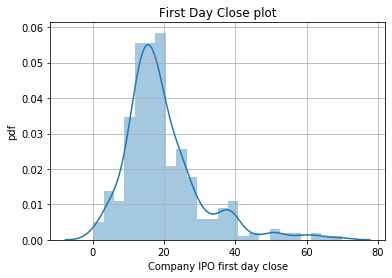

In [36]:
#distribution plot of for the target variable First_Day_Close
ax = sns.distplot(df_raw['First_Day_Close'],kde=True)
plt.title('First Day Close plot')
ax.set_ylabel("pdf")
ax.set_xlabel("Company IPO first day close")
plt.grid(True)
plt.show()

Text(0.5, 0, 'Offer Price')

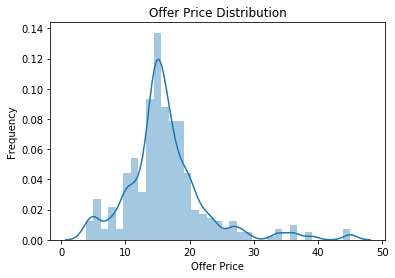

In [37]:
#distribution plot of for the strong predictor Offer_Price
sns.distplot(df_raw['Offer_Price'],kde=True)
#df_raw['Offer_Price'].hist()
plt.title('Offer Price Distribution')
plt.ylabel('Frequency')
plt.xlabel('Offer Price')

Text(0.5, 0, 'Estimated Valuation')

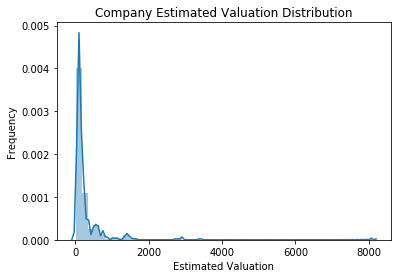

In [38]:
#distribution plot of for the stong predictor Est_volume_millions
sns.distplot(df_raw['Est_volume_millions'],kde=True)
#df_raw['Est_volume_millions'].hist()
plt.title('Company Estimated Valuation Distribution')
plt.ylabel('Frequency')
plt.xlabel('Estimated Valuation')

In [39]:
#quantify skewness and kurtosis of strong predictors
from scipy.stats import kurtosis, skew

print( 'excess kurtosis_offer_price : {}'.format( kurtosis(np.log(df_raw['Offer_Price'])) ))
print( 'skewness_offer_price : {}\n'.format( skew(np.log(df_raw['Offer_Price']))))

print( 'excess kurtosis_est_volume : {}'.format( kurtosis(np.log(df_raw['Est_volume_millions'])) ))
print( 'skewness_est_volume : {}'.format( skew(np.log(df_raw['Est_volume_millions']))))

excess kurtosis_offer_price : 2.2711760706650317
skewness_offer_price : -0.732347521499271

excess kurtosis_est_volume : 1.235271370260092
skewness_est_volume : 0.25541726235918993


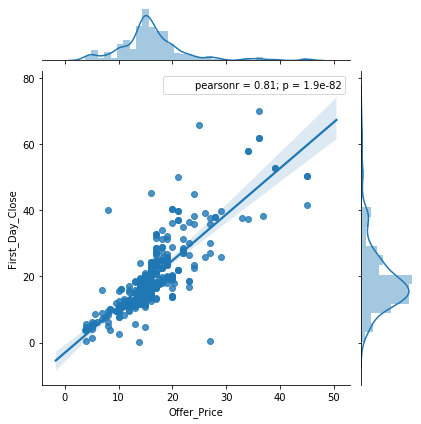

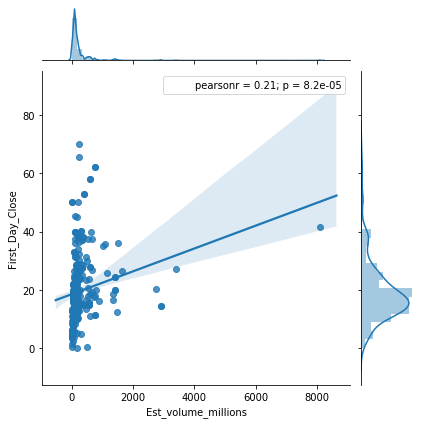

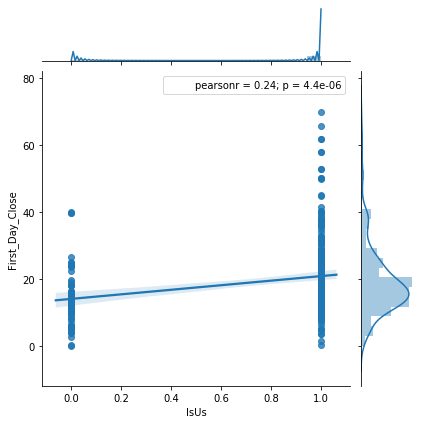

In [40]:
#outlier check

import scipy.stats as stats

j = sns.jointplot(data=df_raw, x='Offer_Price',y='First_Day_Close',kind='reg')
j.annotate(stats.pearsonr)
plt.show()

j = sns.jointplot(data=df_raw, x='Est_volume_millions',y='First_Day_Close',kind='reg')
j.annotate(stats.pearsonr)
plt.show()

j = sns.jointplot(data=df_raw, x='IsUs',y='First_Day_Close',kind='reg')
j.annotate(stats.pearsonr)
plt.show()

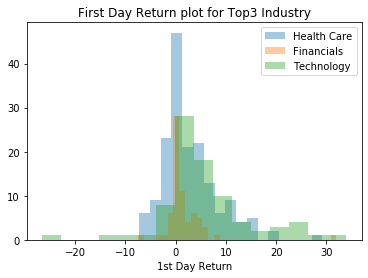

In [41]:
#check on first-day return (close_price - offer_price) in different industry IPOs 

df_raw['1st Day Return'] = df_raw['First_Day_Close'] - df_raw['Offer_Price']

#return on healcare IPO
df_Health = df_raw.loc[df_raw['Industry']=='Healthcare']
df_Health_return = df_Health['1st Day Return']
sns.distplot(df_Health_return,kde=False, label='Health Care')

#return on Financial IPO
df_Financials  = df_raw.loc[df_raw['Industry']=='Financials']
df_Financials_return = df_Financials['1st Day Return']
sns.distplot(df_Financials_return,kde=False, label='Financials')

#return on Technology
df_Technology = df_raw.loc[df_raw['Industry']=='Technology']
df_Technology_return = df_Technology['1st Day Return']
sns.distplot(df_Technology_return,kde=False, label='Technology')

plt.title('First Day Return plot for Top3 Industry')
ax.set_ylabel("Frequency")
ax.set_xlabel("Company IPO first day return")
plt.legend()
plt.show()

#**Data transformation**
- Part1: data encoding
- Part2: drop unnecessary columns

In [68]:
#Encode the industry columns into multiple binary columns

Exchange_type = df_raw.Exchange.unique()

for Exchange in Exchange_type:
    df_raw[Exchange] = df_raw.Exchange.apply(lambda x: 1 if x == Exchange else 0)
df = df_raw.drop(columns=['Exchange','Company'])
df.head()

Industry_types = df.Industry.unique()
for Indy in Industry_types:
    df[Indy] = df.Industry.apply(lambda x: 1 if x == Indy else 0)

df.head()

,Industry,Employee_size,Age,IsUs,Revenues_millions,Net_Income_millions,Is_top8_IB,Offer_Date,Shares_millions,Est_volume_millions,Offer_Price,First_Day_Close,NYSE,NASDAQ,Consumer Services,Industrials,Technology,Healthcare,Energy,Financials,Consumer Goods,Telecommunications,Oil & Gas
0,Consumer Services,2705,20,0,109.7,32.95,1,7/19/2019,13.74,261.10,19.0,23.84,1,0,1,0,0,0,0,0,0,0,0
1,Consumer Services,1117,9,0,184.0,-37.30,1,2018-12-09,7.18,100.50,14.0,13.80,0,1,1,0,0,0,0,0,0,0,0
2,Industrials,18000,145,1,4261.1,-380.50,1,1/19/2018,105.00,1470.00,14.0,12.39,1,0,0,1,0,0,0,0,0,0,0
3,Technology,1075,15,0,76.9,14.90,1,9/26/2018,11.10,194.44,17.5,23.50,0,1,0,0,1,0,0,0,0,0,0
4,Technology,500,7,1,196.6,-105.40,1,2019-12-09,10.00,390.00,39.0,52.75,0,1,0,0,1,0,0,0,0,0,0


In [69]:
#drop columns industry and offer_date before modelling
df = df.drop(['Offer_Date','Industry'], 1)
df.head()

,Employee_size,Age,IsUs,Revenues_millions,Net_Income_millions,Is_top8_IB,Shares_millions,Est_volume_millions,Offer_Price,First_Day_Close,NYSE,NASDAQ,Consumer Services,Industrials,Technology,Healthcare,Energy,Financials,Consumer Goods,Telecommunications,Oil & Gas
0,2705,20,0,109.7,32.95,1,13.74,261.10,19.0,23.84,1,0,1,0,0,0,0,0,0,0,0
1,1117,9,0,184.0,-37.30,1,7.18,100.50,14.0,13.80,0,1,1,0,0,0,0,0,0,0,0
2,18000,145,1,4261.1,-380.50,1,105.00,1470.00,14.0,12.39,1,0,0,1,0,0,0,0,0,0,0
3,1075,15,0,76.9,14.90,1,11.10,194.44,17.5,23.50,0,1,0,0,1,0,0,0,0,0,0
4,500,7,1,196.6,-105.40,1,10.00,390.00,39.0,52.75,0,1,0,0,1,0,0,0,0,0,0


#Random forest regression
- part1: Baseline RFR with default setting
- part2: Discover interaction features that can improve correlation 
- part3: Corss validation on max_depth and max_feature to find optimal parameters
- part4: importance chart plotting to drop weak predictors (reduce overfitting)
- part5: run improved RFR with new interaction features and optimal parameters with normalized datasets


**part 1: baseline RFR model**

In [109]:
#part1

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop('First_Day_Close',1), df['First_Day_Close'], test_size=0.20, shuffle=False)
rf_basemodel = RandomForestRegressor(max_features = 0.5, n_estimators = 100, max_depth=4,random_state=0)

rf_basemodel.fit(x_train, y_train)
train_score = rf_basemodel.score(x_train, y_train)
test_score = rf_basemodel.score(x_test, y_test)
print('The score of this model over training data is {:.3f} and {:.3f} over the testing data'.format(train_score, test_score))

The score of this model over training data is 0.776 and 0.724 over the testing data


**part2: Discover how to combine feature together by mult, divid, sqrt, etc**

- In this section, we will try to run multipe typers of interactions to engineer some strong predictors. Below code will enable you to try different interaction menthods (sqrt, division or multiply) as you want and print out all improvements that are above the threshhold you set.

- Once you determine the new features you wanna add, you can go back to the function define section and add them in *new_feature_combos* function.


In [110]:
#warning are suppressed as there are some rows can cause "divided by 0" error
import warnings
warnings.filterwarnings("ignore")

base_corrs = df.corr().First_Day_Close.drop(index='First_Day_Close')

from contextlib import suppress

for feature1 in base_corrs.index:
  for feature2 in base_corrs.index:
    if feature2 != feature1:
      new_feature = x_train[feature1] / x_train[feature2] #you can try multiply, division or sqrt as you please
      new_corr = np.abs(np.round(np.corrcoef(new_feature, y_train)[0,1], 3)) 
      corr1 = np.abs(np.round(base_corrs[feature1], 3))
      corr2 = np.abs(np.round(base_corrs[feature2], 3))

      # add a threshold of 0.1/0.2 to make sure that the improvement is meaningful
      if new_corr > max(corr1, corr2)+0.1:
        print('{},{} division to get correlation {} compared to {} {}\n'.format(feature1, feature2, new_corr, corr1, corr2))

Shares_millions,Est_volume_millions division to get correlation 0.581 compared to 0.087 0.21

Est_volume_millions,Shares_millions division to get correlation 0.57 compared to 0.21 0.087



In [113]:
#add new features discovered from the above sections, change in the new_feature_combos function code
x_train_interactions = new_feature_combos(x_train)
x_test_interactions = new_feature_combos(x_test)
x_train_interactions.head()

,Employee_size,Age,IsUs,Revenues_millions,Net_Income_millions,Shares_millions,Est_volume_millions,Offer_Price,Industrials,Energy,Consumer Goods,Telecommunications,Oil & Gas
0,2705,20,0,109.7,32.95,13.74,261.10,19.0,0,0,0,0,0
1,1117,9,0,184.0,-37.30,7.18,100.50,14.0,0,0,0,0,0
2,18000,145,1,4261.1,-380.50,105.00,1470.00,14.0,1,0,0,0,0
3,1075,15,0,76.9,14.90,11.10,194.44,17.5,0,0,0,0,0
4,500,7,1,196.6,-105.40,10.00,390.00,39.0,0,0,0,0,0


**Part3: Cross Validation**

In this section, we will run cross validation on our model to find optimal paramter to boost our model performances. 

,0.4,0.5,0.6,0.7
2,0.546544,0.592876,0.630154,0.662250
3,0.685748,0.709804,0.730930,0.746839
4,0.775193,0.788703,0.796964,0.805451
5,0.835330,0.847949,0.850606,0.858839
6,0.880690,0.889138,0.890450,0.896737
7,0.909563,0.915301,0.918040,0.921337
8,0.927682,0.930756,0.931993,0.934445
9,0.936462,0.940013,0.941088,0.941800
10,0.942590,0.943790,0.945736,0.945299
11,0.945584,0.945070,0.947362,0.945642


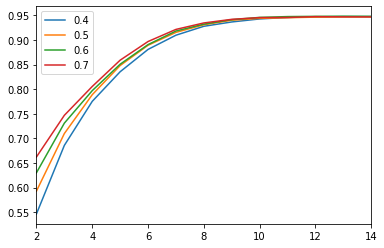

In [112]:
from sklearn.model_selection import cross_validate

feature_range = [0.4, 0.5, 0.6, 0.7]
cv_testscores = pd.DataFrame()
cv_trainscores = pd.DataFrame()
for max_depth in range(2, 15):
    # Initialize the model
    for max_features in feature_range:
        rf_basemodel = RandomForestRegressor(max_features = max_features, n_estimators = 100, max_depth= max_depth,random_state=0)

        # Run cross validation to get measure of out-of-sample error
        cv_results = cross_validate(rf_basemodel, x_train, y_train, cv=5, return_train_score=True)
        
        # Record the average out-of-sample error
        cv_testscores.loc[max_depth,max_features] = cv_results['test_score'].mean()
        cv_trainscores.loc[max_depth,max_features] = cv_results['train_score'].mean()

cv_trainscores.plot()
cv_trainscores

**Part 4: Plot importance chart to drop weak predictors (reduce overfitting)**

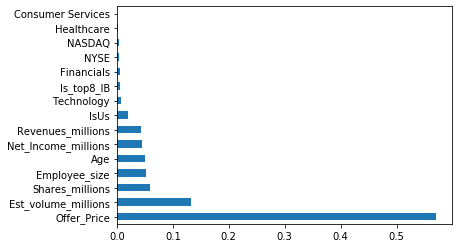

In [102]:
feat_importances = pd.Series(mdl_scaled.feature_importances_, index=x_train.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [0]:
df = df.drop(['Consumer Services','Healthcare','NASDAQ','NYSE','Financials','Is_top8_IB','Technology'],1)

In [108]:
list(df.columns)

['Employee_size',
 'Age',
 'IsUs',
 'Revenues_millions',
 'Net_Income_millions',
 'Shares_millions',
 'Est_volume_millions',
 'Offer_Price',
 'First_Day_Close',
 'Industrials',
 'Energy',
 'Consumer Goods',
 'Telecommunications',
 'Oil & Gas']

**Part 5: Improved RFR**

In [114]:
binary_feature_columns = ['IsUs','Is_top8_IB','Health Care','Technology']

x_train_scaled, x_test_scaled, scaler = new_features_and_normalize(x_train_interactions, x_test_interactions, binary_feature_columns)

mdl_scaled = RandomForestRegressor(max_features = 0.4, n_estimators = 100, max_depth=5, random_state=0)
train_score, test_score = fit_and_score_model(mdl_scaled, x_train_scaled, x_test_scaled, y_train, y_test)

# we can see here is slight imporvment in our testing score, we can try to incorporate more features and more data to further imporve our model.

The train score is 0.8263094154746584 and the test score is 0.7489185231116613


#**Lnear regression (just for fun)**

In [90]:
from sklearn.linear_model import LinearRegression

linreg_base = LinearRegression()
linreg_base.fit(x_train,y_train)

train_score, test_score = fit_and_score_model(linreg_base, x_train, x_test, y_train, y_test)

The train score is 0.6661179888730607 and the test score is 0.7103069782896922


##**LR Normalized**

In [91]:
#linear regression after normalization and new features 
x_train_scaled, x_test_scaled, scaler = new_features_and_normalize(x_train, x_test, binary_feature_columns)

mdl_scaled = RandomForestRegressor(max_features = 0.5, n_estimators = 100, max_depth=4,random_state=0)

train_score, test_score = fit_and_score_model(mdl_scaled, x_train_scaled, x_test_scaled, y_train, y_test)

The train score is 0.7782590285525599 and the test score is 0.7310109628690968
